<a href="https://colab.research.google.com/github/GriffsKode/griffskode.github.io/blob/main/portfolio/amusementAttendance/AmusementParkAttendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This exercise examines Amusement Park Attendance data utilizing Classification and Regression Trees.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree

##### Import the data from the csv file

In [79]:
# Read in the Amusement_Park_Attendance.csv to a Pandas dataframe, "df"
df = pd.read_csv('https://raw.githubusercontent.com/GriffsKode/griffskode.github.io/main/portfolio/amusementAttendance/Amusement_Park_Attendance.csv')

###### Categorical variables will be stored in the categoricals.

In [80]:
# Categorical columns will be stored in 'categoricals' variable.
categoricals = ['month', 'day', 'hour', 'day_of_week', 'holiday']
df[categoricals] = df[categoricals].astype('category')

In [81]:
# Pandas dataframe describe function to better understand the data.
summary = df.describe()
formatted_summary = summary.round(2)
print(formatted_summary)

       attendees     temp  temp_wb  rel_humidity  windspeed  precipitation
count    8603.00  8603.00  8603.00       8603.00    8603.00        8603.00
mean    22559.44    98.78    47.84         67.11      11.10           0.93
std     24975.77    32.92    16.91         18.92       5.46           0.24
min       110.00    -0.60    -3.00         16.00       0.00           0.02
25%      3520.00    71.40    34.00         53.00       7.00           1.00
50%     13200.00    96.60    48.00         68.00      10.00           1.00
75%     33660.00   127.20    62.00         84.00      14.00           1.00
max    142890.00   177.60    81.00        100.00      48.00           2.80


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   attendees      8603 non-null   int64   
 1   month          8603 non-null   category
 2   day            8603 non-null   category
 3   hour           8603 non-null   category
 4   day_of_week    8603 non-null   category
 5   holiday        8603 non-null   category
 6   temp           8603 non-null   float64 
 7   temp_wb        8603 non-null   int64   
 8   rel_humidity   8603 non-null   int64   
 9   windspeed      8603 non-null   int64   
 10  precipitation  8603 non-null   float64 
dtypes: category(5), float64(2), int64(4)
memory usage: 448.3 KB


In [83]:
df.head(6)

,attendees,month,day,hour,day_of_week,holiday,temp,temp_wb,rel_humidity,windspeed,precipitation
0,440,1,1,0,Mon,0,6.6,0,59,16,1.0
1,660,1,1,1,Mon,0,4.8,0,59,11,1.0
2,660,1,1,2,Mon,0,4.8,-1,54,21,1.0
3,110,1,1,5,Mon,0,3.0,-2,54,18,1.0
4,330,1,1,6,Mon,0,3.0,-2,54,15,1.0
5,330,1,1,7,Mon,0,3.0,-2,54,11,1.0


# Training and Testing Datasets

###### The data will be split into 70% training and 30% testing sets.

In [84]:
# Split the data using train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

###### Four datasets are created out of the train and test sets. The datasets consist of "X", "y", "X_test", and "y_test" sets. The y sets will consist of the attendees column from the respected X data set.

In [85]:
# Creating model variables
X = df_train.copy()
y = X.pop('attendees')
X_test = df_test.copy()
y_test = X_test.pop('attendees')

###### Create a Linear Regression formula.

In [86]:
# The variable "my_formula" is the result of the linear regression formula to variable "my_formula"
#my_formula="attendees ~ month + day + hour + day_of_week + holiday"
my_formula = 'attendees ~ ' + '+'.join(df.columns[1:])
print(my_formula)


attendees ~ month+day+hour+day_of_week+holiday+temp+temp_wb+rel_humidity+windspeed+precipitation




###### OLS Regression model is generated and saved as "est"

In [87]:
# OLS Regression and set to 'est' variable
est= ols(formula=my_formula, data=df).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              attendees   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     258.0
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:15:16   Log-Likelihood:                -94223.
No. Observations:                8603   AIC:                         1.886e+05
Df Residuals:                    8527   BIC:                         1.891e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.566e+04   2524

*italicized text*###### Define the Out of Sample Residuals Squared (OSR2)  function

In [88]:
def OSR2(y_pred, y_true, training_mean):
    # Define OSR2
  baseline_error = np.sum(np.square((training_mean - y_true)))
  model_error = np.sum(np.square((y_pred - y_true)))
  return 1.0 - model_error/baseline_error

###### "osr2_result" is the result of the test set on the linear regression model using the OSR2 function.

In [89]:
# Result of OSR2
osr2_result = OSR2(est.predict(X_test), y_test, y.mean())
print(osr2_result)

0.694178733505899


###### Now let's build a tree with default parameters.

In [90]:
# Regression tree is assigned to "tree"
tree = DecisionTreeRegressor(random_state=42)

In [91]:
X.head()

,month,day,hour,day_of_week,holiday,temp,temp_wb,rel_humidity,windspeed,precipitation
5156,8,9,14,Thu,0,154.2,74,61,10,1.000
6290,9,26,1,Wed,0,129.0,68,90,5,1.000
2646,4,26,19,Thu,0,105.6,49,53,13,1.000
439,1,21,16,Sun,1,85.8,39,51,5,1.000
1379,3,2,16,Fri,0,76.8,39,86,46,0.075


###### One-hot encode the categorical variables
One-hot encoding transforms categorical data into a binary matrix, where each category is represented by a unique binary vector. This is helpful for categorical data that does not necessarily have an order.



In [92]:
# One-hot encoding categorical variables
X = pd.get_dummies(X, columns = categoricals)
X_test = pd.get_dummies(X_test, columns = categoricals)

In [93]:
X.head()

,temp,temp_wb,rel_humidity,windspeed,precipitation,month_1,month_2,month_3,month_4,month_5,...,hour_23,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,holiday_0,holiday_1
5156,154.2,74,61,10,1.000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6290,129.0,68,90,5,1.000,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2646,105.6,49,53,13,1.000,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
439,85.8,39,51,5,1.000,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1379,76.8,39,86,46,0.075,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


###### Fit the Classification and Regression Tree (CART) with default settings.

In [94]:
tree.fit(X,y)

DecisionTreeRegressor(random_state=42)

###### Let's check to see how well the CART tree does on the training dataset?

In [95]:
#Assign the output of OSR2 to "result".
result = OSR2(tree.predict(X), y, y.mean())
print(result)

1.0


###### We will verify how big the trree is to ensure it might be a good general model for future datasets.

In [96]:
# Get the shape of the tree and assign the result to "tree_shape"
tree_shape = tree.tree_.node_count, tree.tree_.max_depth
print(tree_shape)

(11321, 47)


###### The tree is very large, so let's check the OSR2 on the test set.

In [97]:
OSR2(tree.predict(X_test), y_test, y.mean())

0.7781904676781646

# Cost Complexity Pruning
Now let's prune the tree!

In [98]:
tree = DecisionTreeRegressor(random_state=42)

In [99]:
# "path" is the output of the pruning path
path = tree.cost_complexity_pruning_path(X,y)
print(path)

{'ccp_alphas': array([0.00000000e+00, 1.00464962e+00, 1.00464962e+00, ...,
       3.20231237e+07, 6.38927192e+07, 1.14395259e+08]), 'impurities': array([0.00000000e+00, 1.00464962e+00, 2.00929924e+00, ...,
       4.57623206e+08, 5.21515925e+08, 6.35911185e+08])}


In [100]:
#Alpha values are assigned to the variable "alphas"
alphas = path.ccp_alphas
print(alphas)

[0.00000000e+00 1.00464962e+00 1.00464962e+00 ... 3.20231237e+07
 6.38927192e+07 1.14395259e+08]


In [101]:
# Check the length of alphas to see how many alpha values have been generated.
len(alphas)

5185

##### Generate about ~50 trees, evenly sampled from this group.
This line creates a new list or array called alphas_small by taking every 100th element from the original list or array alphas. This means there will be 5,185/100 = ~51 trees created

In [102]:
# This line creates a list of every 100th element
alphas_small = alphas[::100]
# This line reverses the order of the elements in alphas_small
alphas_small = alphas_small[::-1]

In [103]:
r2_all = []
osr2_all = []
node_counts = []

# This for loop creates creates a regression tree for each alpha and calculates the out of sample r2 (OSR2)
for alpha in alphas_small:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree.fit(X,y)
    y_pred = tree.predict(X)
    r2_all.append(OSR2(y_pred, y, y.mean()))
    y_pred = tree.predict(X_test)
    osr2_all.append(OSR2(y_pred, y_test, y.mean()))
    node_counts.append(tree.tree_.node_count)

Text(0.5, 1.0, 'Prediction quality vs tree size')

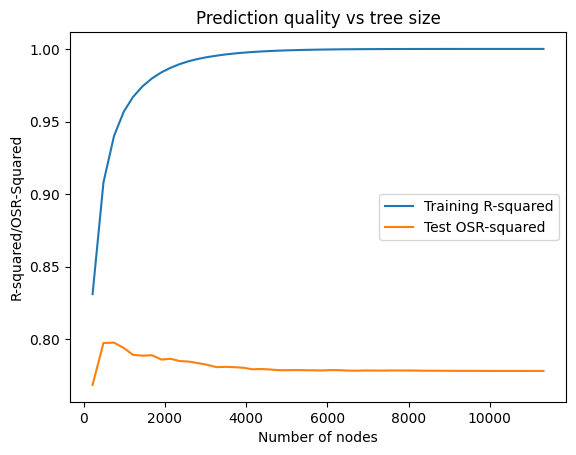

In [104]:
# This plots the training R-squared and the test set out of sample r2 values versus the tree size. Both curves show there is a limit to the number
# of trees before the R2 and OSR2 values decrease or level out.
plt.plot(node_counts, r2_all, label='Training R-squared')
plt.plot(node_counts, osr2_all, label='Test OSR-squared')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('R-squared/OSR-Squared')
plt.title('Prediction quality vs tree size')

###### Let's extract the tree with the corresponding best OSR2.

In [105]:
# Assign the output to "opt_idx"
opt_idx = np.argmax(osr2_all)

In [106]:
 # fit the best tree to the X, y values
 tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alphas_small[opt_idx])
 tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=112830.96658742253, random_state=42)

In [107]:
# Let's check the size of the tree with node count and maximum depth
tree.tree_.node_count, tree.tree_.max_depth

(751, 29)

In [108]:
# Define the function "viz_tree" in order to visualize the tree
def viz_tree(tree, font=6, figsize=(16,10)):
  '''
  draws a classification tree
  '''
  plt.figure(figsize=figsize)  # set plot size (denoted in inches)
  _ = plot_tree(tree,
                feature_names=X.columns,
                filled=True,
                fontsize=font)

###### Let's try to visualize it.

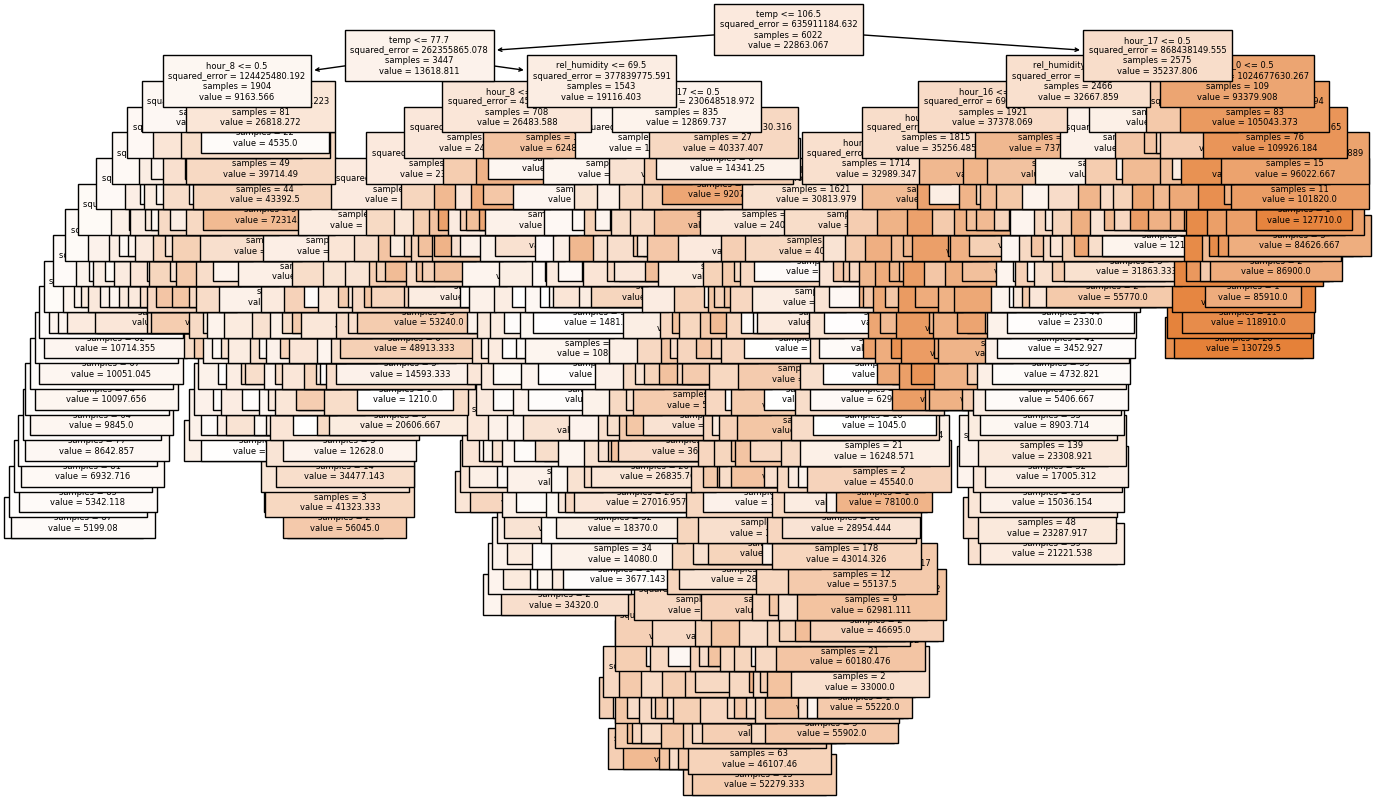

In [109]:
viz_tree(tree)

###### Confirm the tree's OSR2 on the test set.

In [110]:
# The OSR2 output will be to "osr2" and print
osr2 = OSR2(tree.predict(X_test), y_test, y.mean())

print(osr2)

0.7976630986012803
